# House Price Model

In this notebook we will create some fake house price data and train model with the data. 

This model can be used as the basis for the Streamlit assignment. 

## Generate and Visualise Our Data

Let's start by generating 100 samples of fake house price data. 

The model takes in to account area of property in square feet, the number of bedrooms, and the number of bathrooms. 

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from mpl_toolkits.mplot3d import Axes3D

# Set a random seed for reproducibility
np.random.seed(42)

# Number of properties in the dataset
num_samples = 100

# Generate features with realistic distributions
area_sqm = np.random.normal(120, 40, num_samples).astype(int)  # Mean 120 sqm, std 40
area_sqm = np.clip(area_sqm, 40, 300)  # Clip to reasonable range

# Generate number of bedrooms (correlated with area)
bedrooms = []
for area in area_sqm:
    if area < 60:
        bedrooms.append(random.choices([1, 2], weights=[0.8, 0.2])[0])
    elif area < 90:
        bedrooms.append(random.choices([1, 2, 3], weights=[0.2, 0.7, 0.1])[0])
    elif area < 130:
        bedrooms.append(random.choices([2, 3, 4], weights=[0.3, 0.6, 0.1])[0])
    elif area < 180:
        bedrooms.append(random.choices([3, 4, 5], weights=[0.4, 0.5, 0.1])[0])
    else:
        bedrooms.append(random.choices([3, 4, 5, 6], weights=[0.1, 0.3, 0.5, 0.1])[0])

# Generate number of bathrooms (correlated with bedrooms and area)
bathrooms = []
for bed, area in zip(bedrooms, area_sqm):
    if bed == 1:
        bathrooms.append(random.choices([1, 2], weights=[0.9, 0.1])[0])
    elif bed == 2:
        bathrooms.append(random.choices([1, 2, 3], weights=[0.3, 0.5, 0.2])[0])
    elif bed == 3:
        bathrooms.append(random.choices([2, 3, 4], weights=[0.2, 0.6, 0.2])[0])
    elif bed == 4:
        bathrooms.append(random.choices([2, 3, 4], weights=[0.3, 0.5, 0.2])[0])
    else:  # 5 or 6 bedrooms
        bathrooms.append(random.choices([2, 3, 4, 5], weights=[0.2, 0.4, 0.3, 0.1])[0])

# Calculate the base price based on features
# This ensures that price increases with area, bedrooms, and bathrooms
base_price = 100000 + (area_sqm * 2000) + (np.array(bedrooms) * 25000) + (np.array(bathrooms) * 15000)

# Add some randomness to the prices
price_noise = np.random.normal(0, 0.1, num_samples)  # 10% standard deviation
selling_price = base_price * (1 + price_noise)
selling_price = selling_price.astype(int)

# Create the DataFrame
data = {
    'area_sqm': area_sqm,
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'selling_price': selling_price
}

df = pd.DataFrame(data)

# Sort by price to clearly see the correlation
df_sorted = df.sort_values('selling_price')

# Display the first 10 and last 10 rows to see the range
print("First 10 rows (lowest prices):")
print(df_sorted.head(10))
print("\nLast 10 rows (highest prices):")
print(df_sorted.tail(10))

# Print overall statistics
print("\nDataset Statistics:")
print(df.describe())

# Verify price increases with features by calculating correlations
print("\nFeature Correlations with Price:")
print(df.corr()['selling_price'].sort_values(ascending=False))

# Save to CSV, comment out if needed.
# df.to_csv('real_estate_dataset.csv', index=False)
# print("\nDataset saved to 'real_estate_dataset.csv'")

# Return dataframe for further use
df

First 10 rows (lowest prices):
    area_sqm  bedrooms  bathrooms  selling_price
37        41         1          1         214850
74        40         1          1         226087
14        51         2          1         261863
23        63         2          2         263103
13        43         1          1         281669
19        63         1          1         286001
49        49         2          2         286256
26        73         2          2         293708
63        72         2          2         297409
30        95         2          1         299951

Last 10 rows (highest prices):
    area_sqm  bedrooms  bathrooms  selling_price
86       156         4          3         583359
54       161         4          3         583617
59       159         3          4         589307
91       158         4          4         625328
64       152         5          3         629297
20       178         3          4         637749
67       160         4          2         654323
73    

,area_sqm,bedrooms,bathrooms,selling_price
0,139,4,2,436099
1,114,3,4,443524
2,145,4,4,531150
3,180,5,3,579456
4,110,3,3,432903
...,...,...,...,...
95,61,3,3,355177
96,131,4,4,475862
97,130,4,2,497532
98,120,3,3,462677


### Visualise

The data has been generated, now we can plot some of the features. 

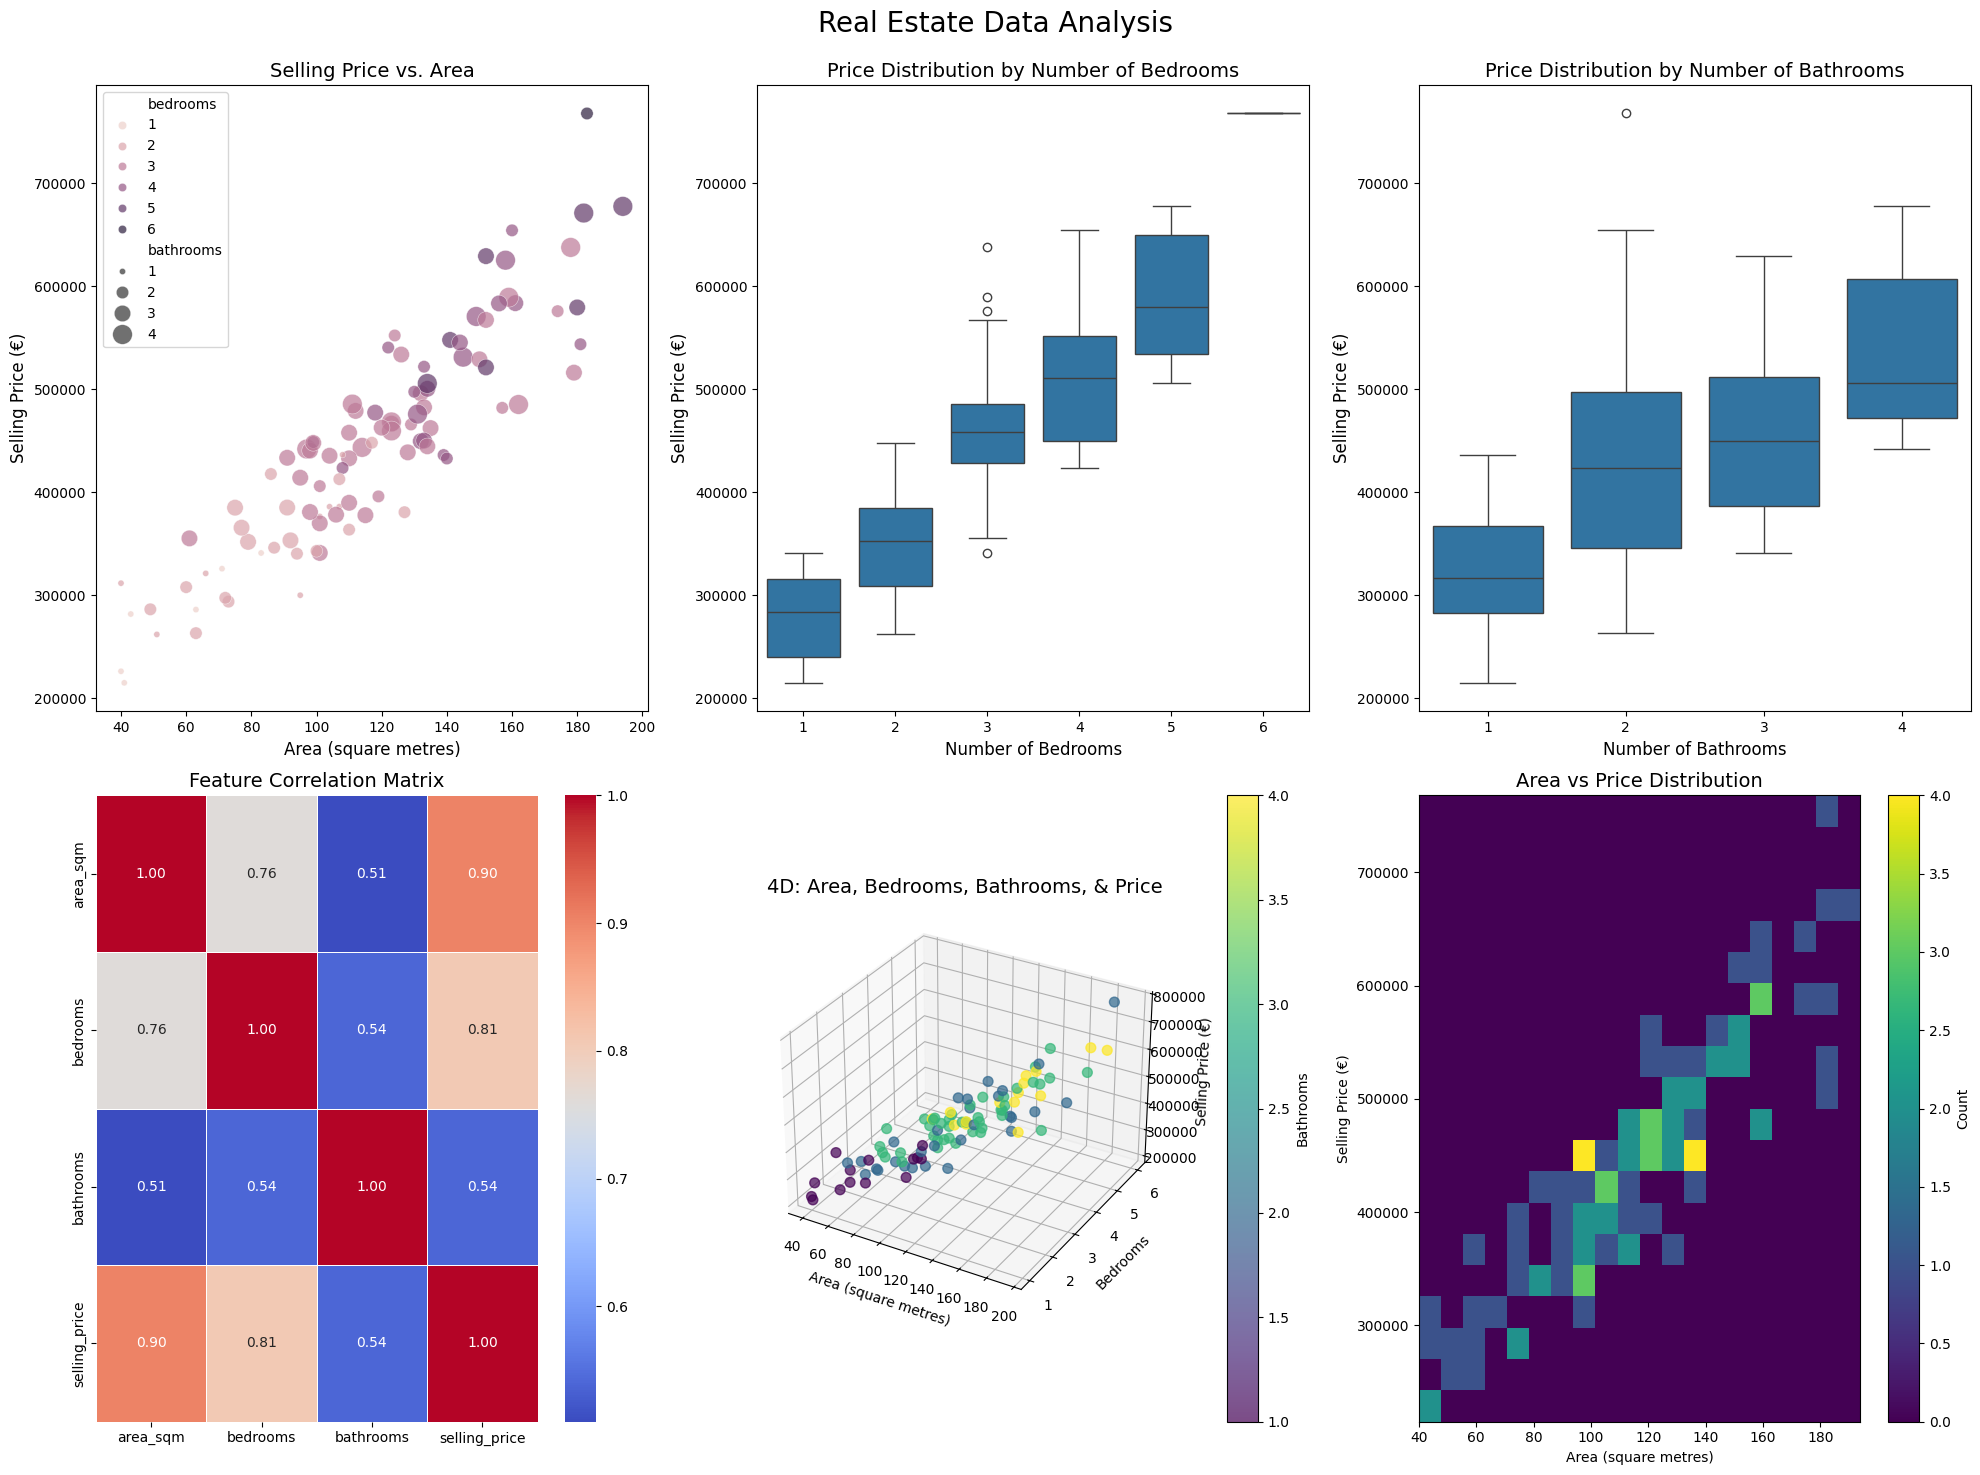

In [2]:
# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 15))
fig.suptitle('Real Estate Data Analysis', fontsize=20, y=0.98)

# 1. Scatter plot: Area vs Price
ax1 = fig.add_subplot(2, 3, 1)
sns.scatterplot(x='area_sqm', y='selling_price', data=df, hue='bedrooms', size='bathrooms', 
                sizes=(20, 200), alpha=0.7, ax=ax1)
ax1.set_title('Selling Price vs. Area', fontsize=14)
ax1.set_xlabel('Area (square metres)', fontsize=12)
ax1.set_ylabel('Selling Price (€)', fontsize=12)

# 2. Box plot: Bedrooms vs Price
ax2 = fig.add_subplot(2, 3, 2)
sns.boxplot(x='bedrooms', y='selling_price', data=df, ax=ax2)
ax2.set_title('Price Distribution by Number of Bedrooms', fontsize=14)
ax2.set_xlabel('Number of Bedrooms', fontsize=12)
ax2.set_ylabel('Selling Price (€)', fontsize=12)

# 3. Box plot: Bathrooms vs Price
ax3 = fig.add_subplot(2, 3, 3)
sns.boxplot(x='bathrooms', y='selling_price', data=df, ax=ax3)
ax3.set_title('Price Distribution by Number of Bathrooms', fontsize=14)
ax3.set_xlabel('Number of Bathrooms', fontsize=12)
ax3.set_ylabel('Selling Price (€)', fontsize=12)

# 4. Heatmap: Feature Correlation
ax4 = fig.add_subplot(2, 3, 4)
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax4)
ax4.set_title('Feature Correlation Matrix', fontsize=14)

# 5. 4D Scatter Plot: Area, Bedrooms, Price, Bathrooms
ax5 = fig.add_subplot(2, 3, 5, projection='3d')
scatter = ax5.scatter(df['area_sqm'], df['bedrooms'], df['selling_price'], 
                     c=df['bathrooms'], cmap='viridis', s=50, alpha=0.7)
ax5.set_xlabel('Area (square metres)')
ax5.set_ylabel('Bedrooms')
ax5.set_zlabel('Selling Price (€)')
ax5.set_title('4D: Area, Bedrooms, Bathrooms, & Price', fontsize=14)
cbar = plt.colorbar(scatter, ax=ax5, pad=0.1)
cbar.set_label('Bathrooms')

# 6. Distribution heat map 
ax6 = fig.add_subplot(2, 3, 6)
h = ax6.hist2d(df['area_sqm'], df['selling_price'], bins=20, cmap='viridis')
ax6.set_xlabel('Area (square metres)')
ax6.set_ylabel('Selling Price (€)')
ax6.set_title('Area vs Price Distribution', fontsize=14)
plt.colorbar(h[3], ax=ax6, label='Count')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.93)

# Show the plot
plt.show()
# plt.savefig('real_estate_visualizations.png', dpi=300, bbox_inches='tight')
plt.close()

## Train Model (Random Forest Regressor)

Now we will train a model on this data using a Random Forest regression algorithm.

First some imports from SciKit Learn:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Split our data into training set and test set:

In [4]:
# Split the data into features and target variable
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 80
Testing set size: 20


Set up the Random Forest and train:

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit/train
model.fit(X_train, y_train)

# Make predictions on test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Evaluate:

In [6]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

results = {
    'Model': 'Random Forest Regressor',
    'Train RMSE': train_rmse,
    'Test RMSE': test_rmse,
    'Train MAE': train_mae,
    'Test MAE': test_mae,
    'Train R²': train_r2,
    'Test R²': test_r2
}

pd.DataFrame.from_dict(results, orient='index')

,0
Model,Random Forest Regressor
Train RMSE,22387.241752
Test RMSE,49810.225218
Train MAE,17441.717433
Test MAE,40424.709808
Train R²,0.956241
Test R²,0.751011


We will now save this model to the current directory: 

In [7]:
with open('house_price_model.pickle', 'wb') as f:
    pickle.dump(model, f)

And test it by opening it and getting it to predict a house price:

In [8]:
with open('house_price_model.pickle', 'rb') as f:
        loaded_model = pickle.load(f)

area = 190
bedrooms = 3
bathrooms = 2

# Because we trained with Pandas DataFrames, it is best to pass a DataFrame to the model
new_house = pd.DataFrame({
    'area_sqm': [area],
    'bedrooms': [bedrooms],
    'bathrooms': [bathrooms]
})

predicted_price = loaded_model.predict(new_house)

print(f"Predicted price ({area} sq. metres, {bedrooms} bedrooms, {bathrooms} bathrooms): €{predicted_price[0]}")

Predicted price (190 sq. metres, 3 bedrooms, 2 bathrooms): €617844.2
